# Introductory examples

## Plotting a White Noise Process

In [1]:
using LinearAlgebra, Statistics, Plots, LaTeXStrings

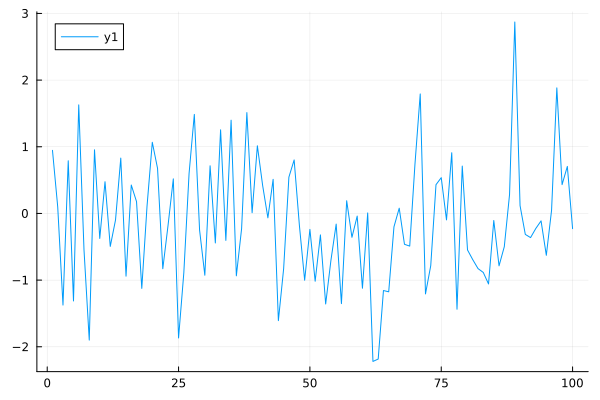

In [2]:
n = 100
ep = randn(n)
plot(1:n, ep)

In [ ]:
generatedata(n) = randn(n).^2 # Genero el vector, y elemento a elemento lo hago al cuadrado

In [4]:
f(x) = x^2
generatedata(n) = f.(randn(n))  # Este es más generico, en el cual le aplico la función f a cada elemento del vector

generatedata (generic function with 1 method)

In [5]:
generatedata(n, gen) = gen.(randn(n)) # Este es el más generico de todos
datos = generatedata(5, f)

5-element Vector{Float64}:
 1.85156016997789
 0.038214710226274505
 0.4997364854139831
 0.4833157472277523
 0.05872164057099495

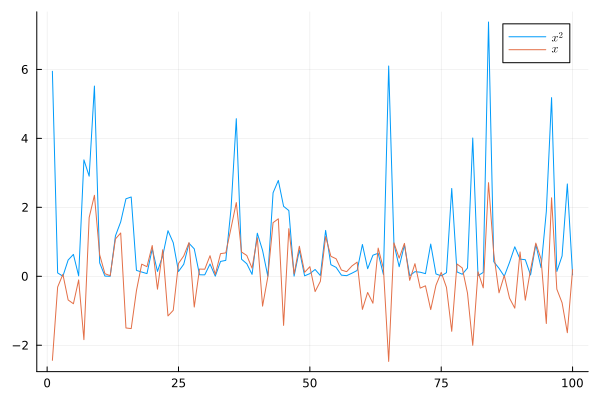

In [6]:
# direct solution with broadcasting, and small user-defined function
n = 100
f(x) = x^2

x = randn(n)
plot(f.(x), label = L"x^2")
plot!(x, label = L"x") # layer on the same plot

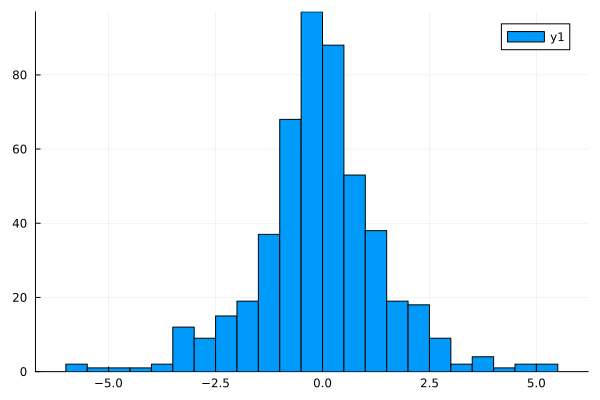

In [7]:
using Distributions

function plothistogram(distribution, n)
    ep = rand(distribution, n)  # n draws from distribution
    histogram(ep)
end

lp = Laplace() # Genera una distribución de Laplace
plothistogram(lp, 500)

# Fixed Point Maps

In [3]:
# better, but still poor style
function v_fp(beta, ρ, v_iv, tolerance, maxiter)
  # setup the algorithm
  v_old = v_iv
  normdiff = Inf
  iter = 1
  while normdiff > tolerance && iter <= maxiter
      v_new = p + beta * v_old # the f(v) map
      normdiff = norm(v_new - v_old)

      # replace and continue
      v_old = v_new
      iter = iter + 1
  end
  return (v_old, normdiff, iter) # returns a tuple
end

# some values
p = 1.0 # note 1.0 rather than 1
beta = 0.9
maxiter = 1000
tolerance = 1.0E-7
v_initial = 0.8 # initial condition

v_star, normdiff, iter = v_fp(beta, p, v_initial, tolerance, maxiter)
println("Fixed point = $v_star
|f(x) - x| = $normdiff in $iter iterations")

Fixed point = 9.999999173706609
|f(x) - x| = 9.181037796679448e-8 in 155 iterations


In [4]:
# better style
function fixedpointmap(f, iv, tolerance, maxiter)
    # setup the algorithm
    x_old = iv
    normdiff = Inf
    iter = 1
    while normdiff > tolerance && iter <= maxiter
        x_new = f(x_old) # use the passed in map
        normdiff = norm(x_new - x_old)
        x_old = x_new
        iter = iter + 1
    end
    return (x_old, normdiff, iter)
end

# define a map and parameters
p = 1.0
beta = 0.9
f(v) = p + beta * v # note that p and beta are used in the function!

maxiter = 1000
tolerance = 1.0E-7
v_initial = 0.8 # initial condition

v_star, normdiff, iter = fixedpointmap(f, v_initial, tolerance, maxiter)
println("Fixed point = $v_star
  |f(x) - x| = $normdiff in $iter iterations")

Fixed point = 9.999999173706609
  |f(x) - x| = 9.181037796679448e-8 in 155 iterations


In [5]:
# good style
function fixedpointmap(f, iv; tolerance = 1E-7, maxiter = 1000)
    # setup the algorithm
    x_old = iv
    normdiff = Inf
    iter = 1
    while normdiff > tolerance && iter <= maxiter
        x_new = f(x_old) # use the passed in map
        normdiff = norm(x_new - x_old)
        x_old = x_new
        iter = iter + 1
    end
    return (; value = x_old, normdiff, iter) # A named tuple
end

# define a map and parameters
p = 1.0
beta = 0.9
f(v) = p + beta * v # note that p and beta are used in the function!

sol = fixedpointmap(f, 0.8; tolerance = 1.0E-8) # don't need to pass
println("Fixed point = $(sol.value)
  |f(x) - x| = $(sol.normdiff) in $(sol.iter) iterations")

Fixed point = 9.999999918629035
  |f(x) - x| = 9.041219328764782e-9 in 177 iterations


In [6]:
r = 2.0
f(x) = r * x * (1 - x) # Pongo una función no lineal para encontrar el fixed point

sol = fixedpointmap(f, 0.8) # the ; is optional but generally good style
println("Fixed point = $(sol.value)
  |f(x) - x| = $(sol.normdiff) in $(sol.iter) iterations")

Fixed point = 0.4999999999999968
  |f(x) - x| = 3.979330237546819e-8 in 7 iterations


In [8]:
# best style
using NLsolve

p = 1.0
beta = 0.9
f(v) = p .+ beta * v # broadcast the + (elemento a elemento sumo p al vector beta * v)
sol = fixedpoint(f, [0.8]; m = 0)
normdiff = norm(f(sol.zero) - sol.zero)
println("Fixed point = $(sol.zero)
  |f(x) - x| = $normdiff in $(sol.iterations) iterations")

Fixed point = [9.999999909587816]
  |f(x) - x| = 9.041219328764782e-9 in 176 iterations


Cambia la precisión con la cual se calcula el fixed point

In [9]:
# use arbitrary precision floating points
p = 1.0
beta = 0.9
iv = [BigFloat(0.8)] # higher precision

# otherwise identical
sol = fixedpoint(v -> p .+ beta * v, iv)
normdiff = norm(f(sol.zero) - sol.zero)
println("Fixed point = $(sol.zero)
  |f(x) - x| = $normdiff in $(sol.iterations) iterations")

# Ahora el residuo es exactamente 0 porque la computadora está haciendo los calculos con un grado de precision en el cual no distingue más de 0

Fixed point = BigFloat[10.00000000000000222044604925031357388532909931412848377287867809936811555686155]
  |f(x) - x| = 0.0 in 3 iterations


#### Mapa multivariado

In [10]:
p = [1.0, 2.0]
beta = 0.9
iv = [0.8, 2.0]
f(v) = p .+ beta * v # note that p and beta are used in the function!

# Se puede generalizar para más de un valor

sol = fixedpointmap(f, iv; tolerance = 1.0E-8)
println("Fixed point = $(sol.value)
  |f(x) - x| = $(sol.normdiff) in $(sol.iter) iterations")

Fixed point = [9.999999961080519, 19.999999923853192]
  |f(x) - x| = 9.501826248250528e-9 in 184 iterations


In [11]:
using NLsolve

p = [1.0, 2.0, 0.1]
beta = 0.9
iv = [0.8, 2.0, 51.0]
f(v) = p .+ beta * v

sol = fixedpoint(v -> p .+ beta * v, iv)
normdiff = norm(f(sol.zero) - sol.zero)
println("Fixed point = $(sol.zero)
  |f(x) - x| = $normdiff in $(sol.iterations) iterations")

Fixed point = [10.0, 20.000000000000004, 0.9999999999999929]
  |f(x) - x| = 6.661338147750939e-16 in 3 iterations


In [13]:
using NLsolve, StaticArrays
p = @SVector [1.0, 2.0, 0.1] # Lo convierte de un vector dinámico a un vector estático
# vector dinámico: se le pueden agregar variables
# vector estático: no se le pueden agregar cosas, son más eficientes
beta = 0.9
iv = [0.8, 2.0, 51.0]
f(v) = p .+ beta * v

sol = fixedpoint(v -> p .+ beta * v, iv)
normdiff = norm(f(sol.zero) - sol.zero)
println("Fixed point = $(sol.zero)
  |f(x) - x| = $normdiff in $(sol.iterations) iterations")

Fixed point = [10.0, 20.000000000000004, 0.9999999999999929]
  |f(x) - x| = 6.661338147750939e-16 in 3 iterations


## Exercises

Armar una nueva función factorial

In [19]:
function factorial2(n)
    k = 1
    for i in 1:n
        k *= i
    end
    return k
end    

println(factorial(5))
println(factorial2(5))

120
120


Armar una función que devuelva una realización de una binomial

In [2]:
function binomial_rv(n, p)
    count = 0
    V = rand(n)
    for i in 1:n
        if V[i] < p
            count += 1
        end
    end
    return count
end

for j in 1:25
    b = binomial_rv(10, 0.5)
    print("$b, ")
end

4, 3, 4, 4, 4, 7, 2, 3, 6, 2, 6, 6, 6, 7, 1, 4, 3, 4, 5, 4, 4, 6, 6, 3, 6, 

Montecarlo para pi

In [29]:
n = 1000000
count = 0
for i in 1:n
    u, v = rand(2)
    d = sqrt((u - 0.5)^2 + (v - 0.5)^2)  # distance from middle of square
    if d < 0.5
        count += 1
    end
end

area_estimate = count / n

print(area_estimate * 4)  # dividing by radius**2

3.142448

Si salen heads 3 veces seguidas, paga 1 dolar

In [34]:
payoff = 0
count = 0

print("Count = ")

for i in 1:10
    U = rand()
    if U < 0.5
        count += 1
    else
        count = 0
    end
    print(count)
    if count == 3
        payoff = 1
    end
end
println("\npayoff = $payoff")

Count = 0123010010
payoff = 1


In [35]:
payoff = 0.0
count = 0.0

print("Count = ")

for i in 1:10
    U = rand()
    count = U < 0.5 ? count + 1 : 0 # El ? dice: si es true: suma 1 a count, si el false, suma 0 a count
    print(count)
    if count == 3
        payoff = 1
    end
end
println("\npayoff = $payoff")

Count = 0010100012
payoff = 0.0


Graficar un proceso AR(1)

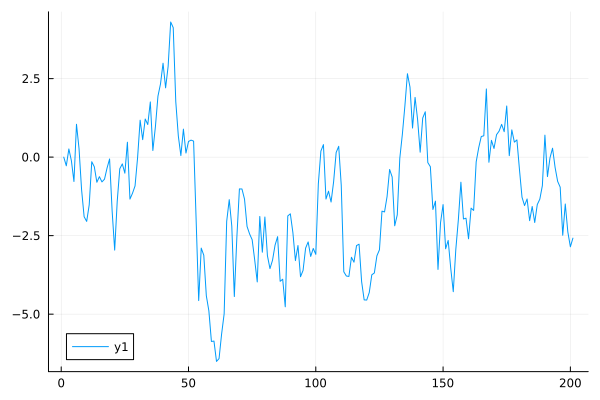

In [38]:
alpha = 0.9
n = 200
x = zeros(n + 1)

for t in 1:n
    x[t + 1] = alpha * x[t] + randn()
end
plot(x)

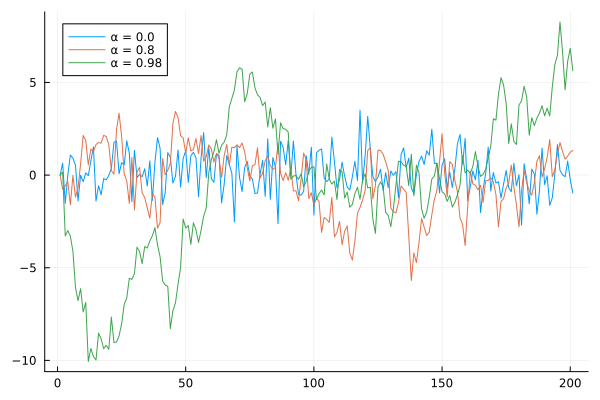

In [46]:
alphas = [0.0, 0.8, 0.98]
n = 200
p = plot() # naming a plot to add to

for alpha in alphas
    x = zeros(n + 1)
    x[1] = 0.0
    for t in 1:n
        x[t + 1] = alpha * x[t] + randn()
    end
    plot!(p, x, label = "α = $alpha") # add to plot p
end
p # display plot